In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LinearRegression



In [17]:
df_red = pd.read_csv('D:/winequality-red.csv', sep=';')
df_white = pd.read_csv('D:/winequality-white.csv', sep=';')

In [4]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
X = df_red.drop(columns = ['quality']).values
y = df_red['quality'].values

linear

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [8]:
model = SVR(kernel="linear", C=100, gamma="auto")
model.fit(X_train, y_train)

SVR(C=100, gamma='auto', kernel='linear')

In [11]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(y_pred)
print(mse)

[5.3142235  4.98972781 5.70963533 5.37325569 5.70125731 5.18546689
 5.00651726 5.10630719 5.69768595 5.71999678 6.19203391 5.26495926
 5.47699472 5.15274517 5.36307594 6.47443579 5.14336492 5.56648431
 6.631381   5.30029083 5.44181799 5.11365766 5.99319724 6.43255443
 5.32342516 5.42665945 6.46993519 5.36966682 5.2419094  6.24035429
 5.21397903 5.46460275 5.69559638 5.31827442 5.44491673 4.93967953
 6.23734374 5.74359236 5.59532377 6.13635585 5.46333823 5.16400393
 6.13484455 5.14387898 5.89562731 5.86755848 6.46658373 5.48790604
 5.15852182 5.54890579 5.29841439 5.26787446 5.61370987 6.51231217
 4.96824152 4.94794111 6.0600534  5.52083501 5.81697538 5.28261181
 5.54545258 5.94130175 5.19772742 5.26814742 6.49558389 5.33929709
 6.37394784 5.35225499 6.51528516 5.27486622 6.46253556 4.74067894
 5.7411754  5.820057   6.21355538 5.21444621 6.89334559 5.9192522
 6.1820943  6.49324132 5.36510799 6.5042392  5.36421765 5.71773121
 5.73048039 6.41571177 5.28695924 5.91040463 6.33016381 5.24673

rbf

In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.2, random_state=42)

In [13]:
model1 = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
model1.fit(X_train2, y_train2)

SVR(C=100, gamma=0.1)

In [14]:
y_pred2 = model.predict(X_test2)
mse2 = mean_squared_error(y_test2, y_pred2)

print(y_pred2)
print(mse2)

[5.3142235  4.98972781 5.70963533 5.37325569 5.70125731 5.18546689
 5.00651726 5.10630719 5.69768595 5.71999678 6.19203391 5.26495926
 5.47699472 5.15274517 5.36307594 6.47443579 5.14336492 5.56648431
 6.631381   5.30029083 5.44181799 5.11365766 5.99319724 6.43255443
 5.32342516 5.42665945 6.46993519 5.36966682 5.2419094  6.24035429
 5.21397903 5.46460275 5.69559638 5.31827442 5.44491673 4.93967953
 6.23734374 5.74359236 5.59532377 6.13635585 5.46333823 5.16400393
 6.13484455 5.14387898 5.89562731 5.86755848 6.46658373 5.48790604
 5.15852182 5.54890579 5.29841439 5.26787446 5.61370987 6.51231217
 4.96824152 4.94794111 6.0600534  5.52083501 5.81697538 5.28261181
 5.54545258 5.94130175 5.19772742 5.26814742 6.49558389 5.33929709
 6.37394784 5.35225499 6.51528516 5.27486622 6.46253556 4.74067894
 5.7411754  5.820057   6.21355538 5.21444621 6.89334559 5.9192522
 6.1820943  6.49324132 5.36510799 6.5042392  5.36421765 5.71773121
 5.73048039 6.41571177 5.28695924 5.91040463 6.33016381 5.24673

Выполнение

In [22]:
learning_rate = 0.01
epochs = 1000

In [23]:
def linear(X1, X2):
    return np.dot(X1, X2.T)

In [34]:
def fit(X, y, C = 100, epsilon = 0.1):
        n_samples, n_features = X.shape
        alpha = np.zeros(n_samples)
        bias = 0
        K = linear(X, X)
        P = np.eye(n_samples) * (C - epsilon)
        q = np.ones(n_samples) * epsilon - y
        A = np.vstack([K, -K])
        b = np.hstack([y, -y])

        for _ in range(epochs):

            dw = P @ alpha + q - A.T @ np.clip(A @ alpha - b, 0, None)
            alpha -= learning_rate * dw
            
        bias = np.mean(y - (K @ alpha)) 
            
        return alpha, bias                                        

In [32]:
def predict(X):
        K = linear(X, X)
        y_pred = np.dot(K, alpha) + bias
        return y_pred

In [36]:
alpha, bias = fit(X_train, y_train)

pred = predict(X_train)
l1 = linear_model.Lasso(alpha=0.1)

print(pred)
print(l1)

C:\Users\Honor\AppData\Local\Temp\ipykernel_5472\4226007343.py:13: RuntimeWarning: overflow encountered in matmul
  dw = P @ alpha + q - A.T @ np.clip(A @ alpha - b, 0, None)
C:\Users\Honor\AppData\Local\Temp\ipykernel_5472\4226007343.py:13: RuntimeWarning: invalid value encountered in matmul
  dw = P @ alpha + q - A.T @ np.clip(A @ alpha - b, 0, None)


AttributeError: 'numpy.ndarray' object has no attribute 'Lasso'

In [54]:
class SVR_Func:
    def __init__(self, C=1, epsilon=0.1, learning_rate=0.01, lambda_reg=0.01):
        self.C = C
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        

    def linear_kernel(self, X1, X2):
        return np.dot(X1, X2.T)

    def fit_func(self, X, y):
        self.X = X
        n, d = X.shape
        K = self.linear_kernel(X, X) 
        P = np.eye(n) * (self.C - self.epsilon)
        q = np.ones(n) * self.epsilon - y
        A = np.vstack([K, -K])
        b = np.hstack([y, -y])
        
        self.alpha = np.zeros(n)
        self.b = 0

        for _ in range(1000):
            gradient = np.dot(P, self.alpha) + q - np.dot(A.T, np.clip(np.dot(A, self.alpha) - b, 0, None))
            #gradient = np.nan_to_num(gradient)
            self.alpha -= self.learning_rate * gradient
            self.alpha = np.clip(self.alpha, -self.C, self.C)

        self.b = np.mean(y - np.dot(self.linear_kernel(X, self.X), self.alpha))

    def predict_func(self, X):
        K = self.linear_kernel(X, self.X) 
        return np.dot(K, self.alpha) + self.b

In [79]:
model = SVR_Func()
model.fit_func(X_train, y_train)
predictions = model.predict_func(X_train)

print(predictions)

[-2216154.96524049 -7553838.61367521  2132616.23790735 ...
 -2247296.55451095  2056974.79240094  2377827.98453762]


In [80]:
predictions.shape

(1279,)

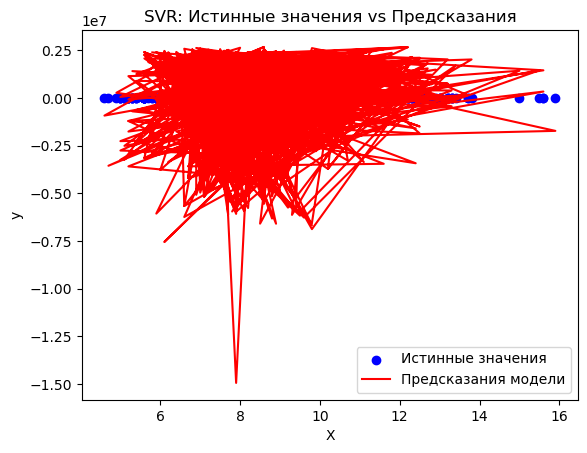

In [81]:

plt.scatter(X_train[:, 0], y_train, color='blue', label='Истинные значения')
plt.plot(X_train[:, 0], predictions, color='red', label='Предсказания модели')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR: Истинные значения vs Предсказания')
plt.legend()
plt.show()

In [93]:
sv_ind = np.argwhere(np.abs(model.alpha) > 1e-5).flatten()

# Создаем тестовые данные для визуализации
X_plot = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100).reshape(-1, 1)
y_svr = model.predict_func(X_plot)

# Линейная регрессия
linear_model = LinearRegression()
linear_model.fit_func(X_train, y_train)
y_linear = linear_model.predict_func(X_plot)

# Построение графика
plt.scatter(X_train[sv_ind, 0], y_train[sv_ind], c="r", s=50, label="SVR support vectors", zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X_train[:100, 0], y_train[:100], c="k", label="data", zorder=1, edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c="r", label="SVR")
plt.plot(X_plot, y_linear, c="g", label="Linear Regression")
plt.xlabel("data")
plt.ylabel("target")
plt.title("SVR и линейная регрессия")
plt.legend()
plt.show()

ValueError: shapes (100,1) and (11,320) not aligned: 1 (dim 1) != 11 (dim 0)

In [86]:
model = SVR_Func()
model.fit_func(X_test, y_test)
predictions_test = model.predict_func(X_test)

print(predictions)

[-2216154.96524049 -7553838.61367521  2132616.23790735 ...
 -2247296.55451095  2056974.79240094  2377827.98453762]


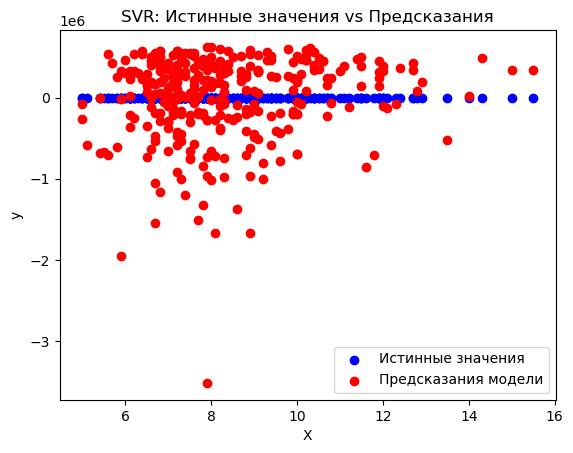

In [88]:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Истинные значения')
plt.scatter(X_test[:, 0], predictions_test, color='red', label='Предсказания модели')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR: Истинные значения vs Предсказания')
plt.legend()
plt.show()

In [ ]:
plt.scatter(X_train[:, 0], y_train, color='blue', label='Истинные значения')
plt.plot(X_train[:, 0], predictions, color='red', label='Предсказания модели')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR: Истинные значения vs Предсказания')
plt.legend()
plt.show()

Белое вино

In [94]:
X_w = df_white.drop(columns = ['quality']).values
y_w = df_white['quality'].values

In [96]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w,y_w,test_size=0.2, random_state=42)

In [97]:
model_w = SVR_Func()
model_w.fit_func(X_train_w, y_train_w)
predictions_w = model_w.predict_func(X_train_w)

print(predictions_w)

[ 13241799.52473471 -32666587.74740663  24623140.60466814 ...
  -6565993.20596915   -469852.25518516  18615902.09550674]


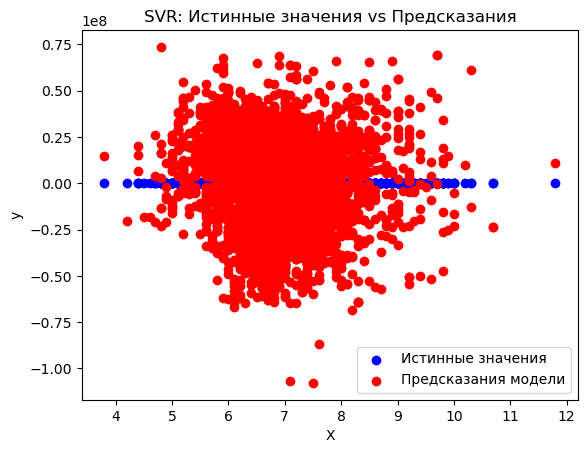

In [98]:
plt.scatter(X_train_w[:, 0], y_train_w, color='blue', label='Истинные значения')
plt.scatter(X_train_w[:, 0], predictions_w, color='red', label='Предсказания модели')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR: Истинные значения vs Предсказания')
plt.legend()
plt.show()

In [99]:
model_wtest = SVR_Func()
model_wtest.fit_func(X_test_w, y_test_w)
predictions_wtest = model_wtest.predict_func(X_test_w)

print(predictions_w)

[ 13241799.52473471 -32666587.74740663  24623140.60466814 ...
  -6565993.20596915   -469852.25518516  18615902.09550674]


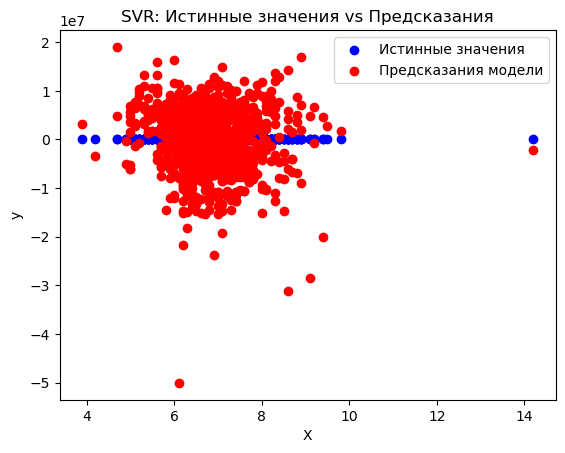

In [100]:
plt.scatter(X_test_w[:, 0], y_test_w, color='blue', label='Истинные значения')
plt.scatter(X_test_w[:, 0], predictions_wtest, color='red', label='Предсказания модели')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR: Истинные значения vs Предсказания')
plt.legend()
plt.show()